In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('Important_features.csv')
df.head()

,InterestAndPenaltyBalance,PrincipalPaymentDifference,PrincipalPaymentsMade,PrincipalBalance,InterestAndPenaltyPaymentsMade,Interest,MonthlyPayment,Amount,AppliedAmount,LanguageCode,Rating,Country,Restructured,LoanDuration,MonthlyPaymentDay,Status_new
0,0.00,115.0408,115.0408,0.00,20.4222,30.0,130.393314,115.0408,319.5582,0,0,0,False,12,25,0
1,0.00,140.6057,140.6057,0.00,2.0227,25.0,130.393314,140.6057,191.7349,0,0,0,False,1,15,0
2,414.07,86.8409,203.1909,116.35,59.7626,25.0,130.393314,319.5409,319.5582,0,0,0,True,20,25,1
3,0.00,57.5205,57.5205,0.00,18.7323,45.0,130.393314,57.5205,127.8233,0,0,0,False,15,15,0
4,0.00,319.5436,319.5436,0.00,220.4200,30.0,130.393314,319.5436,319.5582,0,0,0,False,12,25,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   InterestAndPenaltyBalance       77394 non-null  float64
 1   PrincipalPaymentDifference      77394 non-null  float64
 2   PrincipalPaymentsMade           77394 non-null  float64
 3   PrincipalBalance                77394 non-null  float64
 4   InterestAndPenaltyPaymentsMade  77394 non-null  float64
 5   Interest                        77394 non-null  float64
 6   MonthlyPayment                  77394 non-null  float64
 7   Amount                          77394 non-null  float64
 8   AppliedAmount                   77394 non-null  float64
 9   LanguageCode                    77394 non-null  int64  
 10  Rating                          77394 non-null  int64  
 11  Country                         77394 non-null  int64  
 12  Restructured                    

In [4]:
X = df.copy()
y = X.pop('Status_new')

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Here, X_train and y_train will contain 80% of the data for training, and X_test and y_test will contain 20% for testing.
# test_size specifies the proportion of the dataset to include in the testing split, while random_state ensures reproducibility.

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (61915, 15)
Testing data shape: (15479, 15)
Training labels shape: (61915,)
Testing labels shape: (15479,)


In [6]:
st= StandardScaler()
x_train= st.fit_transform(X_train)
x_test= st.transform(X_test)

**KNN Classifier**

for training dataset


In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_knn)
print('Accuracy:',accuracy)
print(classification_report(y_train, y_pred_knn))

Accuracy: 0.959799725430025
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     27739
           1       0.98      0.95      0.96     34176

    accuracy                           0.96     61915
   macro avg       0.96      0.96      0.96     61915
weighted avg       0.96      0.96      0.96     61915



Text(0.5, 1.0, 'Predicted values with k=5')

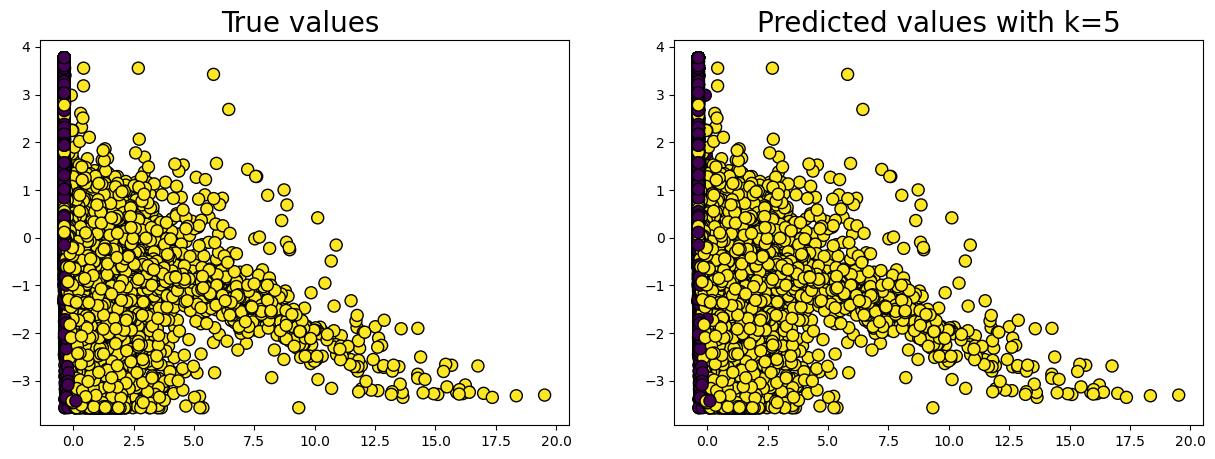

In [8]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train,s=75, edgecolor='black')
plt.title("True values ", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(x_train[:,0], x_train[:,1], c=y_pred_knn, s=75, edgecolor='black')
plt.title("Predicted values with k=5", fontsize=20)

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_knn)
print('Accuracy:',accuracy)
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.9342980812714
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6861
           1       0.97      0.91      0.94      8618

    accuracy                           0.93     15479
   macro avg       0.93      0.94      0.93     15479
weighted avg       0.94      0.93      0.93     15479



For test dataset

Text(0.5, 1.0, 'Predicted values with k=5')

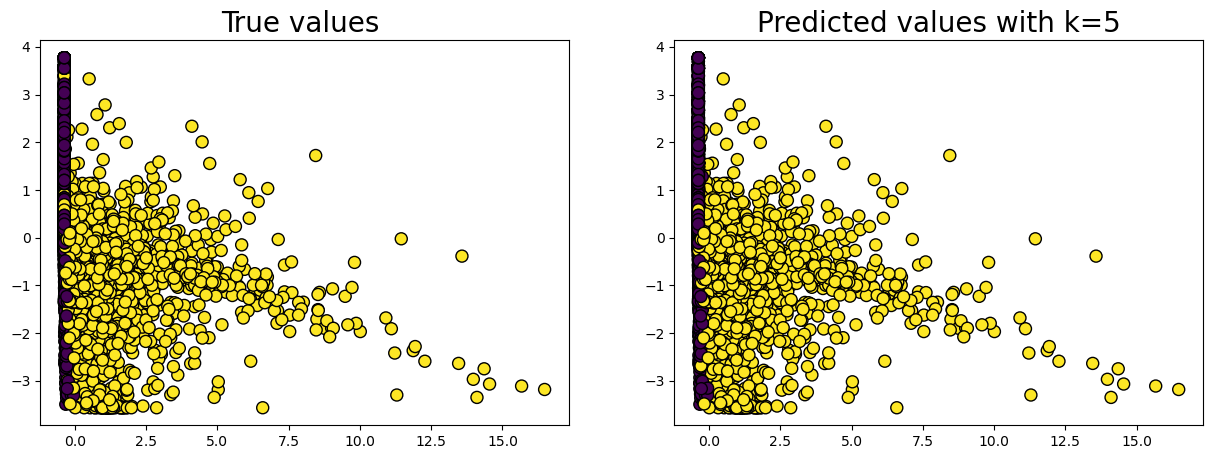

In [10]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test,s=75, edgecolor='black')
plt.title("True values ", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred_knn, s=75, edgecolor='black')
plt.title("Predicted values with k=5", fontsize=20)

XGBClassifier

For train dataset

In [11]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_xgb)
print(accuracy)

0.9745618993781797


In [12]:
print(classification_report(y_train, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27739
           1       1.00      0.96      0.98     34176

    accuracy                           0.97     61915
   macro avg       0.97      0.98      0.97     61915
weighted avg       0.98      0.97      0.97     61915



Text(0.5, 1.0, 'Predicted values with XGBClassifier')

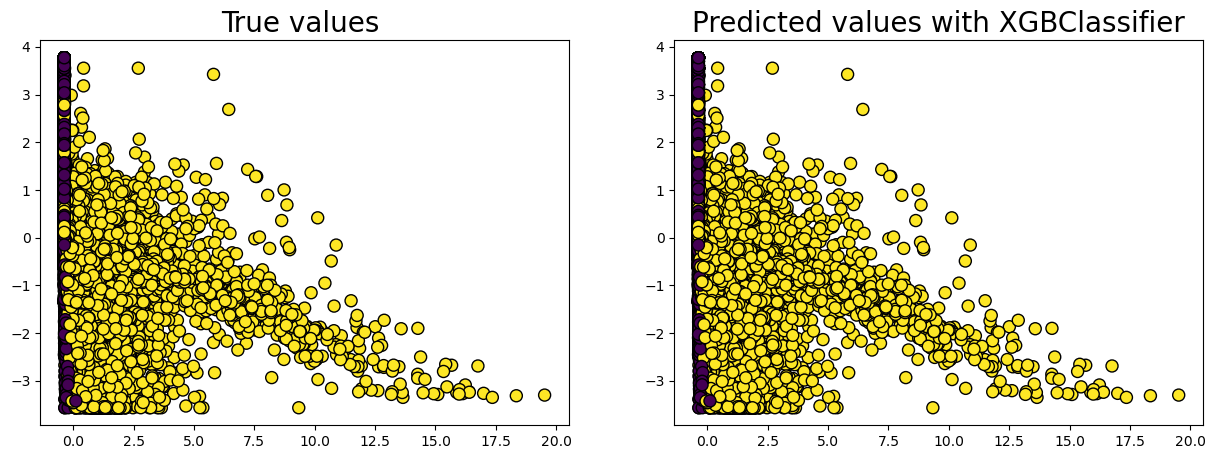

In [13]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train,s=75, edgecolor='black')
plt.title("True values ", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(x_train[:,0], x_train[:,1], c=y_pred_xgb, s=75, edgecolor='black')
plt.title("Predicted values with XGBClassifier", fontsize=20)

for test dataset

In [14]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_xgb)
print('Accuracy:',accuracy)

Accuracy: 0.9607855804638542


In [15]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      6861
           1       0.99      0.94      0.96      8618

    accuracy                           0.96     15479
   macro avg       0.96      0.96      0.96     15479
weighted avg       0.96      0.96      0.96     15479



Text(0.5, 1.0, 'Predicted values with XGBClassifier')

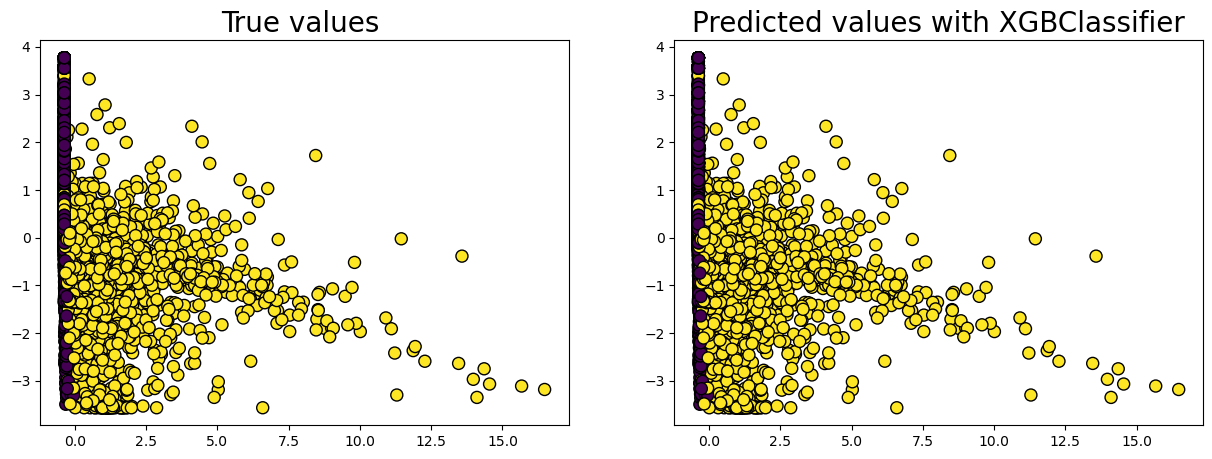

In [16]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test,s=75, edgecolor='black')
plt.title("True values ", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred_xgb, s=75, edgecolor='black')
plt.title("Predicted values with XGBClassifier", fontsize=20)